In [1]:
#import all required libraries for reading data,analysing an visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
#Read training & test data
liver_df=pd.read_csv("indian_liver_patient.csv")

In [3]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
#Describe statistical information about NUMERICAL columns in dataset
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [6]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
liver_df.dropna()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [9]:
#Reading the CSV
df=pd.read_csv("/kaggle/input/titanic/train.csv")

In [10]:
new_liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
new_liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


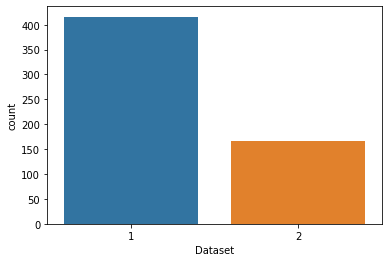

In [12]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


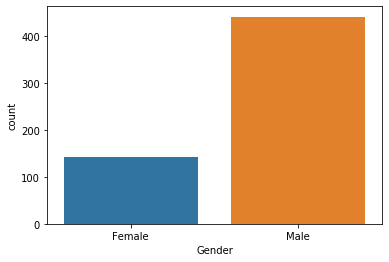

In [13]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

C:\Users\anusha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


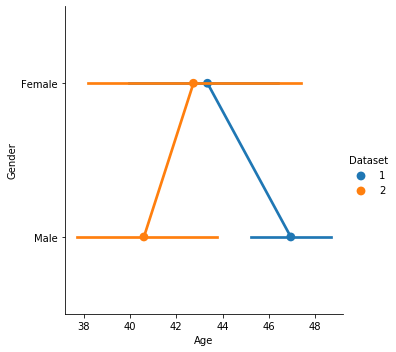

In [14]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

In [15]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [16]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


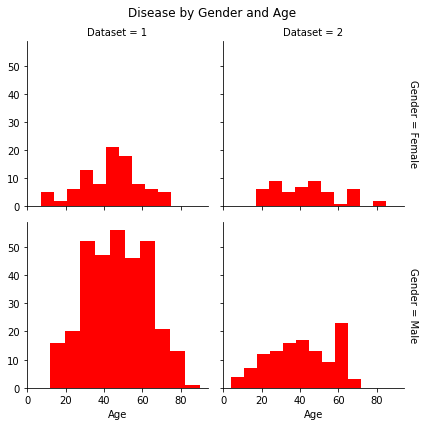

In [17]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

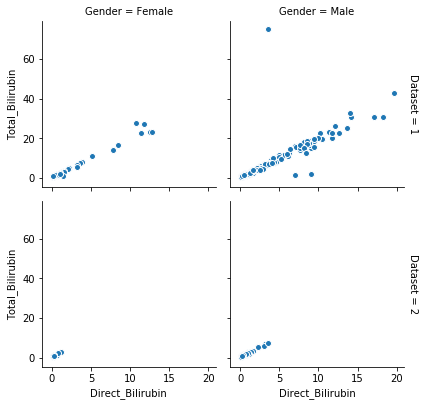

In [18]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

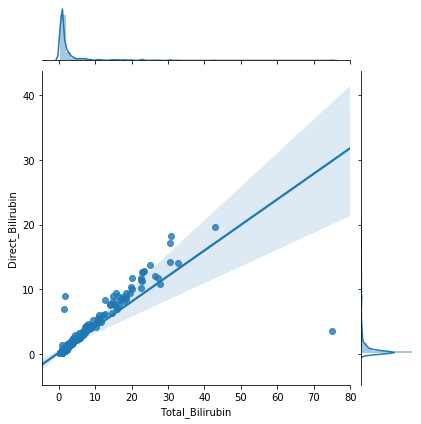

In [19]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

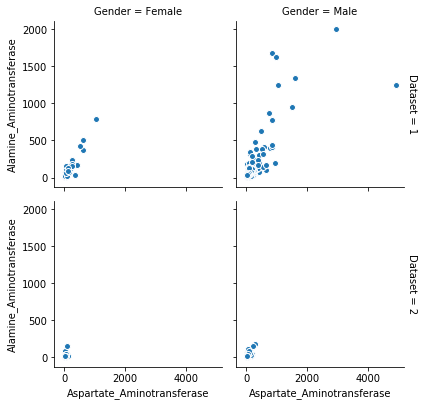

In [20]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

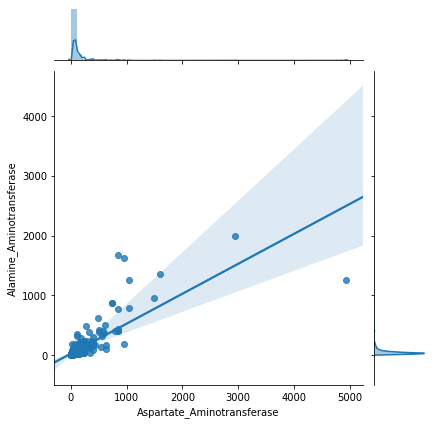

In [21]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

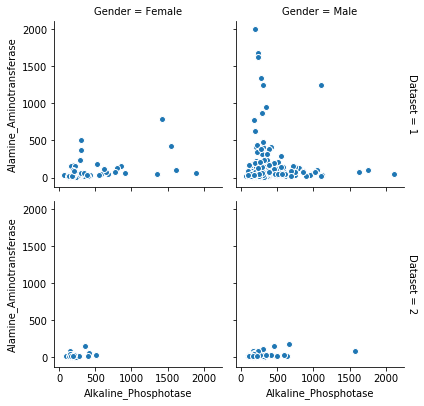

In [22]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

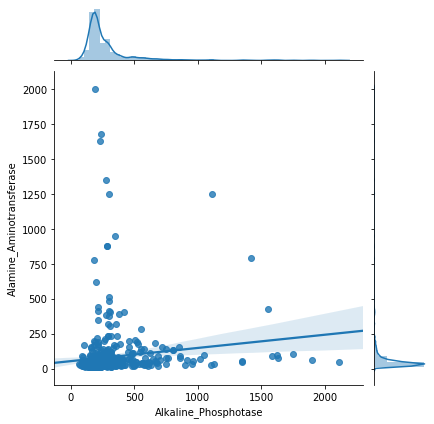

In [23]:

sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

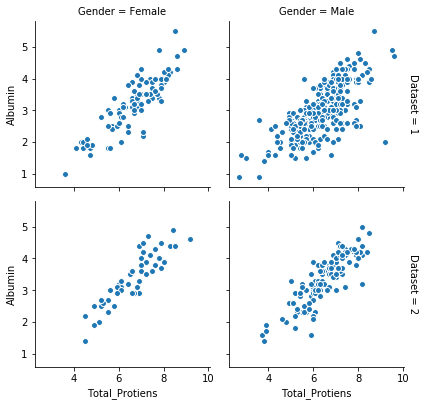

In [24]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

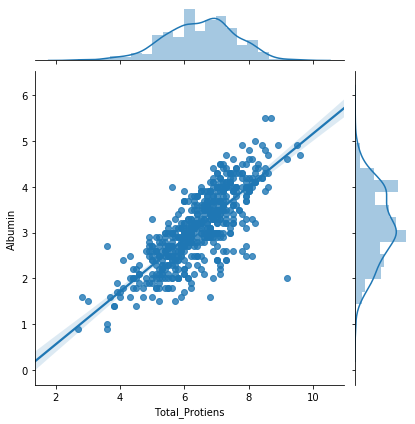

In [25]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

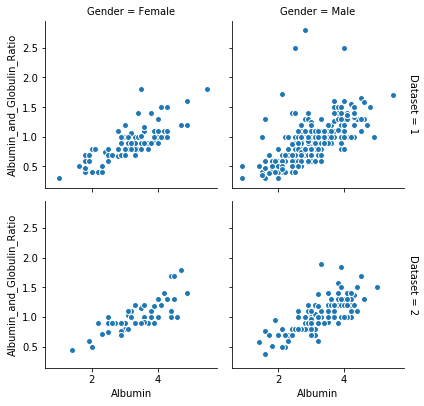

In [26]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

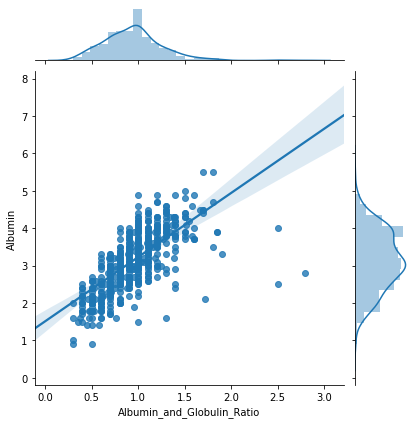

In [27]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

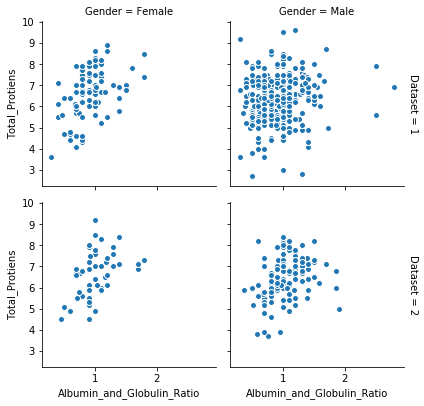

In [28]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [29]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [30]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()


,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [32]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [33]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [34]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [35]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())


In [36]:
#liver_df[liver_df['Albumin_and_Globulin_Ratio'] == 0.9470639032815201]


In [37]:
X = liver_df.drop(['Gender','Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [38]:
y = liver_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [39]:
#Correlation
liver_corr = X.corr()

In [40]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


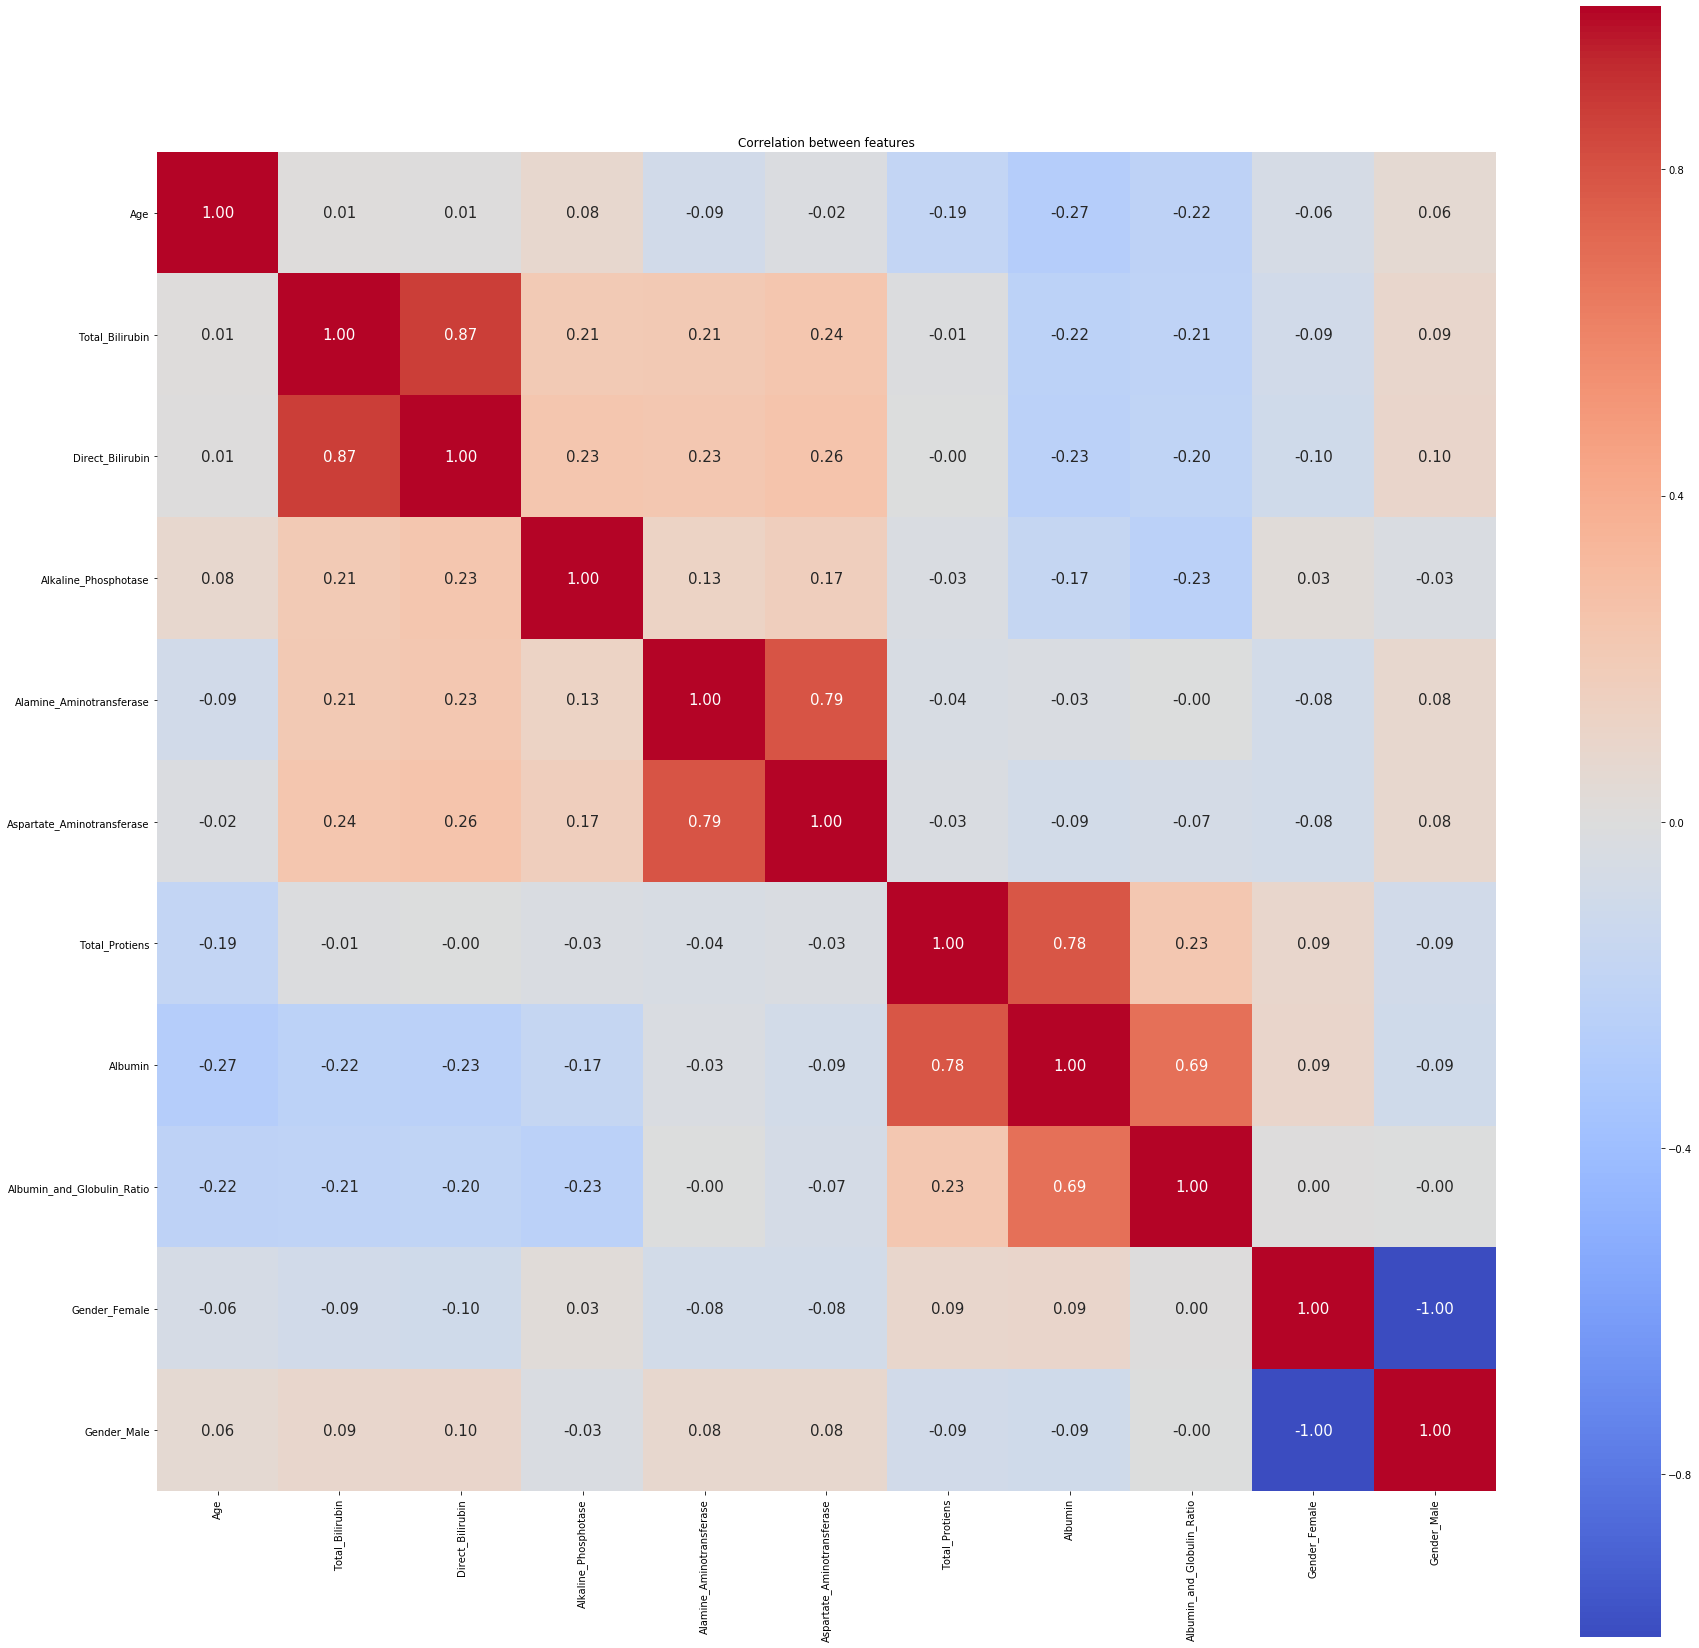

In [41]:

plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [42]:

#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [43]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


Logistic Regression Training Score: 
 73.53
Logistic Regression Test Score: 
 66.29
Accuracy: 
 0.6628571428571428
Confusion Matrix:
 [[104  20]
 [ 39  12]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.73      0.84      0.78       124
           2       0.38      0.24      0.29        51

    accuracy                           0.66       175
   macro avg       0.55      0.54      0.53       175
weighted avg       0.62      0.66      0.64       175



C:\Users\anusha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


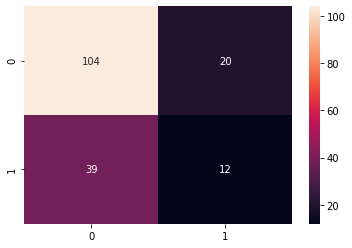

In [45]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix:\n',confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [46]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Albumin_and_Globulin_Ratio,0.655894
9,Gender_Female,0.490605
10,Gender_Male,0.248348
7,Albumin,0.223967
3,Alkaline_Phosphotase,-0.001004
5,Aspartate_Aminotransferase,-0.003106
4,Alamine_Aminotransferase,-0.010525
0,Age,-0.013318
1,Total_Bilirubin,-0.027844
6,Total_Protiens,-0.213149


KNeighborsClassifier score:
 78.43
KNeighborsClassifier test score:
 69.14
Accuracy:
 0.6914285714285714
confusion Matrix:
 [[96 28]
 [26 25]]
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.77      0.78       124
           2       0.47      0.49      0.48        51

    accuracy                           0.69       175
   macro avg       0.63      0.63      0.63       175
weighted avg       0.70      0.69      0.69       175



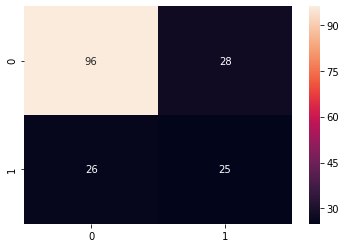

In [47]:
# KNeighbors Classifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
#Predict output
mod_predicted=model.predict(X_test)
model_score=round(model.score(X_train,y_train)*100,2)
model_score_test=round(model.score(X_test,y_test)*100,2)
print('KNeighborsClassifier score:\n',model_score)
print('KNeighborsClassifier test score:\n',model_score_test)
print('Accuracy:\n',accuracy_score(y_test,mod_predicted))
print('confusion Matrix:\n',confusion_matrix(y_test,mod_predicted))
print('Classification Report:\n',classification_report(y_test,mod_predicted))
sns.heatmap(confusion_matrix(y_test,mod_predicted),annot=True,fmt="d")



DecisionTreeClassifier score:
 100.0
DecisionTreeClassifier Test score:
 65.14
Accuracy:
 0.6514285714285715
Confusion Matrix:
 [[89 35]
 [26 25]]
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.72      0.74       124
           2       0.42      0.49      0.45        51

    accuracy                           0.65       175
   macro avg       0.60      0.60      0.60       175
weighted avg       0.67      0.65      0.66       175



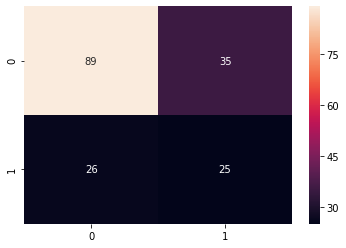

In [48]:
# Decision Tree Classifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
#Predict output
y_predicted=clf.predict(X_test)
clf_score=round(clf.score(X_train,y_train)*100,2)
clf_score_test=round(clf.score(X_test,y_test)*100,2)
print('DecisionTreeClassifier score:\n',clf_score)
print('DecisionTreeClassifier Test score:\n',clf_score_test)
print('Accuracy:\n',accuracy_score(y_test,y_predicted))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predicted))
print('Classification Report:\n',classification_report(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt="d")

In [49]:
###Model evaluation
models = pd.DataFrame({
    'Model':['Logistic Regression','KNeighborsClassifier','Decision Tree Classifier'],
    'Score':[logreg_score,model_score,clf_score],
    'Test Score':[logreg_score_test,model_score_test,clf_score_test]})
models.sort_values(by='Test Score',ascending=False)

,Model,Score,Test Score
1,KNeighborsClassifier,78.43,69.14
0,Logistic Regression,73.53,66.29
2,Decision Tree Classifier,100.00,65.14
